## Experiment:Capturing heights and weights of people

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
heights_in_feet = [2, 3.1, 5.2, 4.5, 6.5, 7.1, 5, 2.8, 4.6, 3.44]

In [3]:
weights_in_kg = [7, 20, 48.22, 40.34, 85.43, 65.71, 60.2, 25.8, 27, 20]

In [4]:
bmi_df = pd.DataFrame({'Heights':heights_in_feet, 'Weights':weights_in_kg})
sigma = pd.DataFrame({'Heights':heights_in_feet, 'Weights':weights_in_kg})

In [5]:
bmi_df['BMI'] = (bmi_df['Weights'])/(bmi_df['Heights']*0.3048)
sigma['BMI'] = (bmi_df['Weights'])/(bmi_df['Heights']*0.3048)

In [6]:
bmi_df

,Heights,Weights,BMI
0,2.00,7.00,11.482940
1,3.10,20.00,21.166709
2,5.20,48.22,30.423481
3,4.50,40.34,29.410907
4,6.50,85.43,43.120331
5,7.10,65.71,30.363942
6,5.00,60.20,39.501312
7,2.80,25.80,30.230596
8,4.60,27.00,19.257104
9,3.44,20.00,19.074651


In [7]:
health_status = []
pdf = []
for x in range(0,10):
    if bmi_df['BMI'][x] > 30:
        health_status.append('Obese')
        pdf.append(0.5)
    elif ((bmi_df['BMI'][x] >= 15) & (bmi_df['BMI'][x] <=25)):
        health_status.append('Ideal')
        pdf.append(0.3)
    elif ((bmi_df['BMI'][x] > 25) & (bmi_df['BMI'][x] <=30)):
        health_status.append('Overweight')
        pdf.append(0.1)
    elif bmi_df['BMI'][x] < 15:
        health_status.append('Underweight')
        pdf.append(0.1)
bmi_df['Health'] = pd.Series(health_status)
bmi_df['Probability of a person being underweight/ideal weight/overweight/obese'] = pd.Series(pdf)
bmi_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
0,2.00,7.00,11.482940,Underweight,0.1
1,3.10,20.00,21.166709,Ideal,0.3
2,5.20,48.22,30.423481,Obese,0.5
3,4.50,40.34,29.410907,Overweight,0.1
4,6.50,85.43,43.120331,Obese,0.5
5,7.10,65.71,30.363942,Obese,0.5
6,5.00,60.20,39.501312,Obese,0.5
7,2.80,25.80,30.230596,Obese,0.5
8,4.60,27.00,19.257104,Ideal,0.3
9,3.44,20.00,19.074651,Ideal,0.3


## Few practical events in determining health

### Sigma of the experiment of collecting heights and weights is the variable sigma as shown below

In [8]:
#Defining sigma
sigma

,Heights,Weights,BMI
0,2.00,7.00,11.482940
1,3.10,20.00,21.166709
2,5.20,48.22,30.423481
3,4.50,40.34,29.410907
4,6.50,85.43,43.120331
5,7.10,65.71,30.363942
6,5.00,60.20,39.501312
7,2.80,25.80,30.230596
8,4.60,27.00,19.257104
9,3.44,20.00,19.074651


### Calculating F(power set of sigma) such that probability is defined from F to [0,1]

In [9]:
subsets = []
for i in range(0,2**10):
    subset = []
    for k in range(10):
        if i and 1<<k:
            subset.append(sigma.loc[k].tolist())
    subsets.append(subset)
F = subsets

In [10]:
#Omega-1
#Event-1: BMI of person >= 25 and <=30
overweight_df = bmi_df[(bmi_df.BMI>=25) & (bmi_df.BMI<=30)]
overweight_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
3,4.5,40.34,29.410907,Overweight,0.1


In [11]:
#Omega-2
#Event-2: BMI of person>30
obese_df = bmi_df[bmi_df['BMI']>30]
obese_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
2,5.2,48.22,30.423481,Obese,0.5
4,6.5,85.43,43.120331,Obese,0.5
5,7.1,65.71,30.363942,Obese,0.5
6,5.0,60.20,39.501312,Obese,0.5
7,2.8,25.80,30.230596,Obese,0.5


In [12]:
#Omega-3
#Event-3: BMI of person<15
underweight_df = bmi_df[bmi_df['BMI']<=15]

In [13]:
underweight_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
0,2.0,7.0,11.48294,Underweight,0.1


In [14]:
#Omega-4
#Event-4: BMI of person>15 and <25
ideal_df = bmi_df[(bmi_df.BMI>15) & (bmi_df.BMI<25)]
ideal_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
1,3.10,20.0,21.166709,Ideal,0.3
8,4.60,27.0,19.257104,Ideal,0.3
9,3.44,20.0,19.074651,Ideal,0.3


### Independent events

In [15]:
#Independent events set 1
ide1_df = bmi_df[(bmi_df['Health']=='Obese')]
ide1_df
ide2_df = bmi_df[(bmi_df['Heights']<3)]

In [16]:
ide2_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
0,2.0,7.0,11.482940,Underweight,0.1
7,2.8,25.8,30.230596,Obese,0.5


In [17]:
ide1_df

,Heights,Weights,BMI,Health,Probability of a person being underweight/ideal weight/overweight/obese
2,5.2,48.22,30.423481,Obese,0.5
4,6.5,85.43,43.120331,Obese,0.5
5,7.1,65.71,30.363942,Obese,0.5
6,5.0,60.20,39.501312,Obese,0.5
7,2.8,25.80,30.230596,Obese,0.5


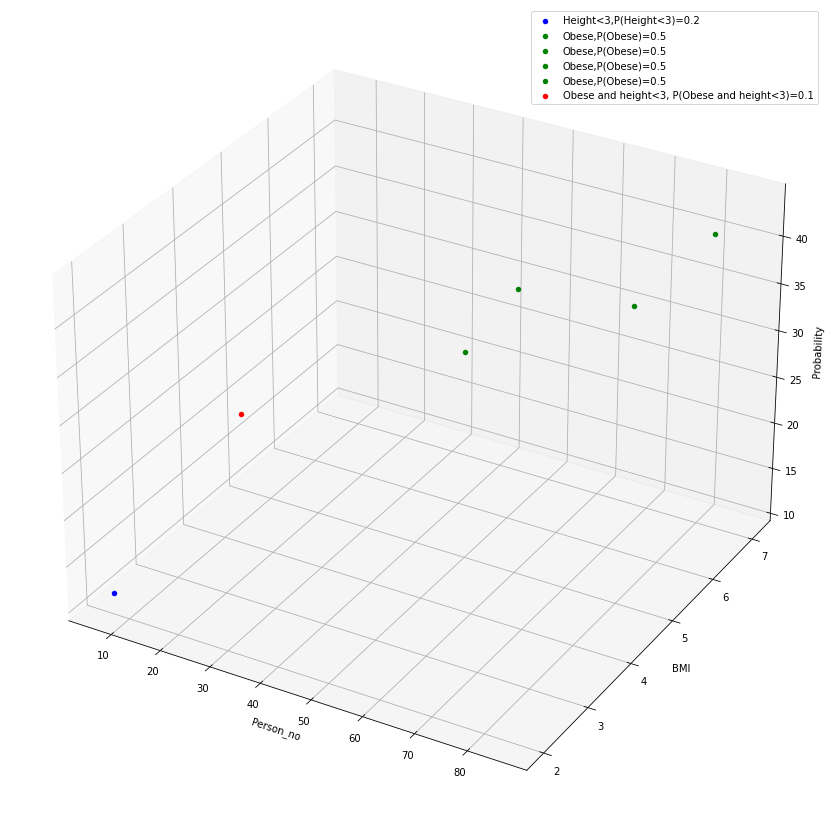

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.axes(projection="3d")
ax.set_xlabel('Person_no')
ax.set_ylabel('BMI')
ax.set_zlabel('Probability')
colors = ['red','blue','green']
for i in range(0,len(bmi_df)):
    x,y,z = bmi_df['Weights'][i],bmi_df['Heights'][i],bmi_df['BMI'][i]
    if ((bmi_df['Health'][i] == 'Obese') & (bmi_df['Heights'][i]<3)):
        ax.scatter(x,y,z,c=colors[0],label='Obese and height<3, P(Obese and height<3)=0.1')
    elif (bmi_df['Heights'][i]<3):
        ax.scatter(x,y,z,c=colors[1],label='Height<3,P(Height<3)=0.2')
    elif (bmi_df['Health'][i] =='Obese'):
        ax.scatter(x,y,z,c=colors[2],label='Obese,P(Obese)=0.5')
plt.legend()
plt.show()

#### As P(Obese and height<3) = P(Obese)*P(Height<3), P(Obese) and P(Height<3) are independent

### Analysis of omega-1,omega-2,omega-3,omega-4

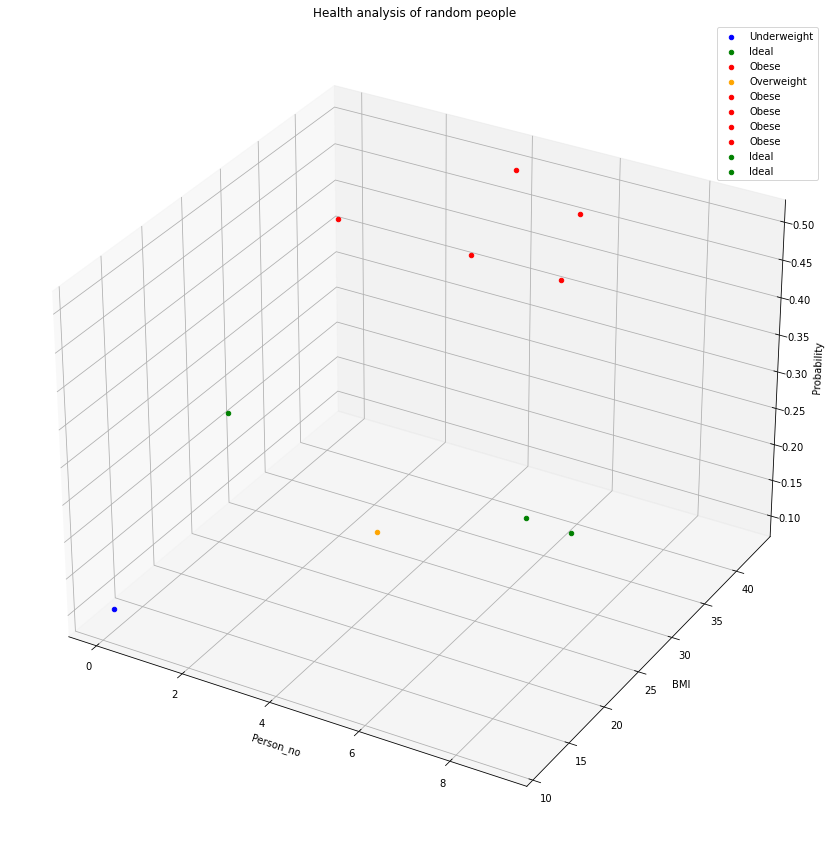

In [19]:
from mpl_toolkits import mplot3d
colors = ['blue','green','orange','red']
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection="3d")
ax.set_xlabel('Person_no')
ax.set_ylabel('BMI')
ax.set_zlabel('Probability')
ax.set_title('Health analysis of random people')
for i in range(0,len(bmi_df)):
    x,y,z = i,bmi_df['BMI'][i],bmi_df['Probability of a person being underweight/ideal weight/overweight/obese'][i]
    if (bmi_df['Health'][i] == 'Ideal'):
        ax.scatter(x,y,z,c=colors[1],label='Ideal')
    elif (bmi_df['Health'][i]=='Underweight'):
        ax.scatter(x,y,z,c=colors[0],label='Underweight')
    elif (bmi_df['Health'][i] =='Overweight'):
        ax.scatter(x,y,z,c=colors[2],label='Overweight')
    elif (bmi_df['Health'][i] =='Obese'):
        ax.scatter(x,y,z,c=colors[3],label='Obese')

plt.legend()
plt.show()

## Experiment: Tossing 2 coins and 1 dice

### Calculating sigma for the experiment

In [20]:
#Experiment is tossing 2 coins and one dice
#Outcome of coin toss is given by heads(0) and tails(1)
#F is power set of sigma_2 and probability is mapped from F to [0,1]
sigma_2 = []
for dice in range(1,7):
    for coin_1 in range(0,2):
        for coin_2 in range(0,2):
            sigma_2.append([coin_1,coin_2,dice])
sigma_2

[[0, 0, 1],
 [0, 1, 1],
 [1, 0, 1],
 [1, 1, 1],
 [0, 0, 2],
 [0, 1, 2],
 [1, 0, 2],
 [1, 1, 2],
 [0, 0, 3],
 [0, 1, 3],
 [1, 0, 3],
 [1, 1, 3],
 [0, 0, 4],
 [0, 1, 4],
 [1, 0, 4],
 [1, 1, 4],
 [0, 0, 5],
 [0, 1, 5],
 [1, 0, 5],
 [1, 1, 5],
 [0, 0, 6],
 [0, 1, 6],
 [1, 0, 6],
 [1, 1, 6]]

In [21]:
experiment_df = pd.DataFrame({'Coin_throw_1':pd.Series([sigma_2[x][0] for x in range(0,24)]), 'Coin_throw_2':pd.Series([sigma_2[x][1] for x in range(0,24)]), 'Dice_throw':pd.Series([sigma_2[x][2] for x in range(0,24)])})

In [22]:
experiment_df

,Coin_throw_1,Coin_throw_2,Dice_throw
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,1
4,0,0,2
5,0,1,2
6,1,0,2
7,1,1,2
8,0,0,3
9,0,1,3


In [23]:
#One possible event: Getting a heads in first toss
head_first_df = experiment_df[experiment_df['Coin_throw_1']==0]
head_first_df

,Coin_throw_1,Coin_throw_2,Dice_throw
0,0,0,1
1,0,1,1
4,0,0,2
5,0,1,2
8,0,0,3
9,0,1,3
12,0,0,4
13,0,1,4
16,0,0,5
17,0,1,5


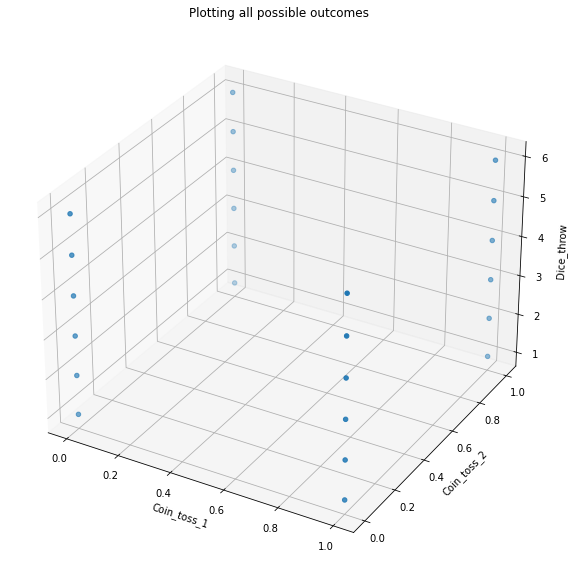

In [24]:
#Plotting all possible outcomes
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title('Plotting all possible outcomes')
ax.set_xlabel('Coin_toss_1')
ax.set_ylabel('Coin_toss_2')
ax.set_zlabel('Dice_throw')
ax.scatter(experiment_df['Coin_throw_1'],experiment_df['Coin_throw_2'],experiment_df['Dice_throw']);

### Independent events

#### Getting a heads in first coin toss and 6 in last throw of dice

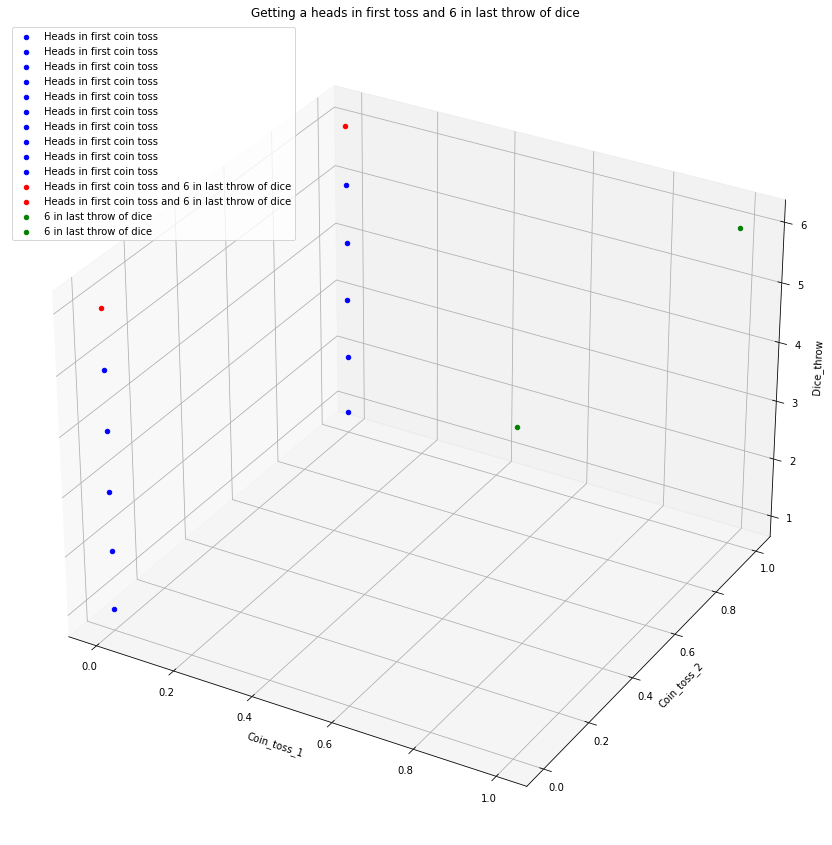

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.axes(projection="3d")
colors = ['red','blue','green']
ax.set_title('Getting a heads in first toss and 6 in last throw of dice')
ax.set_xlabel('Coin_toss_1')
ax.set_ylabel('Coin_toss_2')
ax.set_zlabel('Dice_throw')
for i in range(0,len(experiment_df)):
    x,y,z = experiment_df['Coin_throw_1'][i],experiment_df['Coin_throw_2'][i],experiment_df['Dice_throw'][i]
    if ((experiment_df['Coin_throw_1'][i] == 0) & (experiment_df['Dice_throw'][i]==6)):
        ax.scatter(x,y,z,c=colors[0],label='Heads in first coin toss and 6 in last throw of dice')
    elif(experiment_df['Coin_throw_1'][i]==0):
        ax.scatter(x,y,z,c=colors[1],label='Heads in first coin toss')
    elif(experiment_df['Dice_throw'][i]==6):
        ax.scatter(x,y,z,c=colors[2],label='6 in last throw of dice')
plt.legend()
plt.show()

#### As P(heads in toss-1)*P(6 in throw of dice) = (1/12) = P(heads in toss-1 and 6 in last throw of dice), both are independent events